In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import tree
import itertools
import codecs

To-Do
- Normalize data
- Feature engineering

Data available:
device,
lot,
wafer,
step,
id,
x,
y,
probex,
probey,
die,
region,
size,
mrbb,
img,
channel,
qualifier,
matched?,
bin,
ecat,
reg,
x2,
y2

In [2]:
# Decision tree
# Factors to consider: Region, Size, MRBB, Channel ID, Defect Class
# Correlation to: ECAT, Bin
# Result: Kill ratio
# Control: Wafer, Step ID, Year=2018

In [33]:
zerolimit = 50
k = 0
matrix = []
result = []
testmatrix = []
testresult = []
regdict = {"A":1,"B":2,"C":3,"D":4,"E":5}

In [38]:
with codecs.open('trainsample.txt', 'r', "utf-16") as data:
    file = data.readlines()
    count = len(file)
    bound = int(count*0.8)  # creating set for training data
    data.seek(0)
    #print(file[1])
    for line in itertools.islice(file,0,bound):
        row = []
        if "Z32B" in line:
            text = line.split()
            if int(text[16]) == 0 and k > zerolimit:
                pass
            elif  text[10] != '#N/A':
                if int(text[12]) < 900: # MRBB
                    # generate training data set
                    row.append(int(regdict[text[10]])) # Region
                    row.append(float(text[11])) # Defect Size
                    if int(text[12]) < 400:
                        row.append(400) # MRBB
                    else:
                        row.append(500) # MRBB
                    row.append(int(text[13])) # ChannelID
                    result.append(int(text[16])) # E-Fail(0/1)
                    matrix.append(row)
                    if int(text[16]) == 0:
                        k += 1
        #print(line)
    for line in itertools.islice(file, bound, count):
        row = []
        if "Z32B" in line:
            text = line.split()
            if text[10] != '#N/A':
                if int(text[12]) < 900:  # MRBB
                    # generate training data set
                    row.append(int(regdict[text[10]]))  # Region
                    row.append(float(text[11]))  # Defect Size
                    if int(text[12]) < 400:
                        row.append(400)  # MRBB
                    else:
                        row.append(500)  # MRBB
                    row.append(int(text[13]))  # ChannelID
                    testresult.append(int(text[16]))  # E-Fail(0/1)
                    testmatrix.append(row)

In [39]:
matrix

[[1, 0.18, 500, 6],
 [2, 1.326, 500, 0],
 [5, 0.967, 500, 6],
 [1, 0.232, 500, 0],
 [5, 0.095, 500, 6],
 [1, 12.132, 500, 0],
 [1, 2.092, 500, 0],
 [1, 4.16, 500, 0],
 [1, 6.548, 500, 6],
 [1, 10.312, 500, 0],
 [1, 9.44, 500, 0],
 [1, 2.56, 500, 0],
 [5, 0.336, 500, 0],
 [2, 0.104, 500, 0],
 [2, 0.159, 500, 0],
 [2, 0.16, 500, 0],
 [2, 0.32, 500, 6],
 [2, 0.16, 500, 0],
 [5, 0.103, 500, 0],
 [3, 16.32, 500, 0],
 [2, 0.199, 500, 0],
 [2, 0.196, 500, 0],
 [2, 0.198, 500, 0],
 [2, 0.201, 500, 0],
 [2, 0.16, 500, 0],
 [2, 0.16, 500, 0],
 [2, 0.186, 500, 0],
 [2, 0.16, 500, 0],
 [2, 0.18, 500, 0],
 [2, 0.204, 500, 6],
 [2, 0.152, 500, 0],
 [2, 0.152, 500, 0],
 [2, 0.187, 500, 6],
 [2, 0.171, 500, 0],
 [4, 1.318, 500, 0],
 [3, 0.3, 500, 6],
 [2, 0.22, 500, 0],
 [5, 0.53, 500, 0],
 [5, 0.257, 500, 6],
 [2, 0.558, 500, 6],
 [2, 0.175, 500, 0],
 [2, 0.209, 500, 0],
 [2, 0.96, 500, 0],
 [2, 1.44, 500, 0],
 [2, 1.44, 500, 0],
 [2, 0.8, 500, 0],
 [2, 0.8, 500, 0],
 [2, 0.96, 500, 0],
 [2, 0.96, 50

In [37]:
print("\nTraining with %d/%d total data points "%(len(result), count))
print("Training with %d/%d True Defects \n"%(sum(result), 40))
print('*'*50+" \n")

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5) 
clf.fit(matrix,result)
total = sum(clf.predict(testmatrix))
lst = [i for i in clf.predict(testmatrix)]
correct = sum([i * j for i,j in zip(lst, testresult)])

print("Testing with %d/%d total data points \n" % (len(testresult),count))
print("Identified = %d/%d Expected Fails" % (total,(40-sum(result))))
print("True Positive = %d/%d identified (%.1f %%)" % (correct,(40-sum(result)),correct/(40-sum(result))*100))
print("False Positive = %d/%d identified (%.1f %%) \n" % ((total-correct),total,(total-correct)/total*100))
print("Prediction Score = %.2f %%" % (clf.score(testmatrix,testresult)*100))


Training with 71/58136 total data points 
Training with 20/40 True Defects 

************************************************** 

Testing with 11157/58136 total data points 

Identified = 6416/20 Expected Fails
True Positive = 11/20 identified (55.0 %)
False Positive = 6405/6416 identified (99.8 %) 

Prediction Score = 42.56 %


> Maximum prediction score is at 77.78% when adjusting: 
* max_depth ~3-5, 
* zerolimit ~50-2000, 
* bound ~80-90% 

##### Graphing Decision Tree

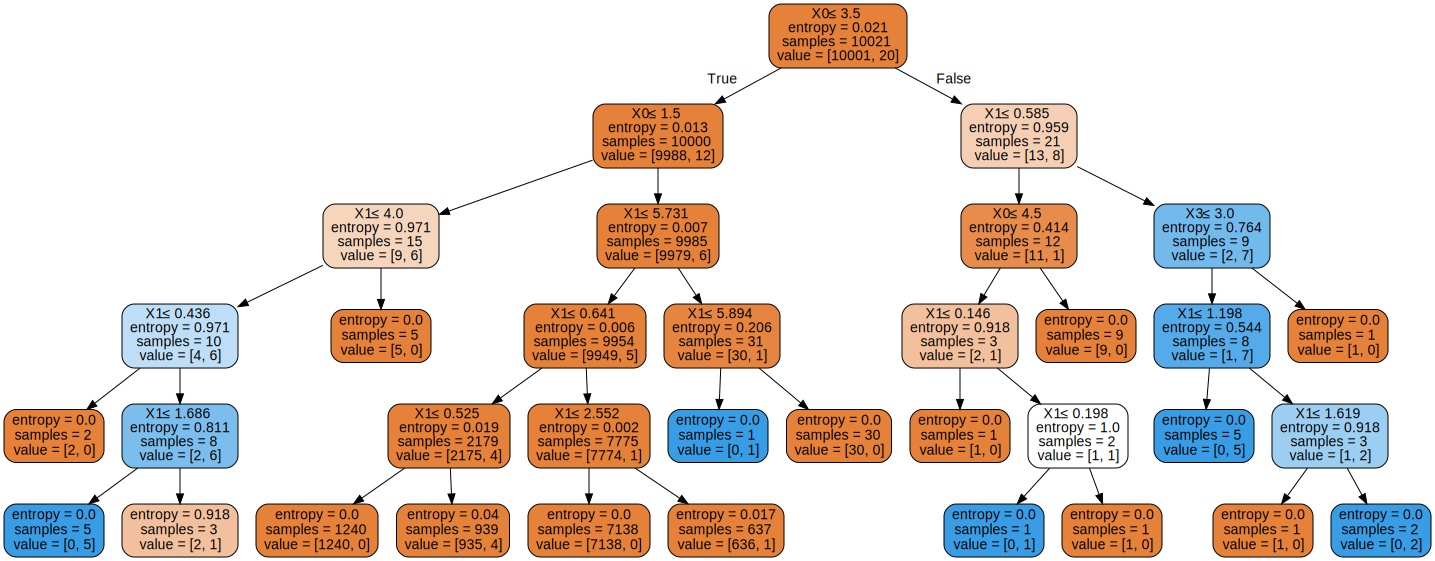

In [13]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 